In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [61]:
df = pd.read_csv(r"/content/housing.csv")

In [62]:
print(df.head(5))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [63]:
df['median_house_value'] = df['median_house_value'].fillna(df['median_house_value'].mean())
df['median_income'] = df['median_income'].fillna(df['median_income'].mean())

In [64]:
# Step 2: Select one predictor feature
# Example: Using 'median_income' to predict 'median_house_value'
X = df[['median_income']]
y = df['median_house_value']


In [65]:
#step 3 split data into training and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [66]:
#step 4 train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [67]:
#step 5 make predictions
y_pred = model.predict(X_test)

In [68]:
#step 6 evaluation
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

print("----- Evaluation Metrics -----")
print("Mean Absolute Error (MAE):", round(MAE, 2))
print("Mean Squared Error (MSE):", round(MSE, 2))
print("Root Mean Squared Error (RMSE):", round(RMSE, 2))
print("R² Score:", round(R2, 4))


----- Evaluation Metrics -----
Mean Absolute Error (MAE): 62315.59
Mean Squared Error (MSE): 6917979868.05
Root Mean Squared Error (RMSE): 83174.39
R² Score: 0.4729


In [69]:
#Step 7 Show sample actual vs predicted
sample = pd.DataFrame({
    'median_income': X_test['median_income'].values,
    'actual_price': y_test.values,
    'predicted_price': y_pred
})
print("\nSample actual vs predicted:")
print(sample.head())


Sample actual vs predicted:
   median_income  actual_price  predicted_price
0         1.6812       47700.0    115101.618068
1         2.5313       45800.0    150652.227930
2         3.4801      500001.0    190330.405365
3         5.7376      218600.0    284737.536013
4         3.7250      278000.0    200571.958542
5         4.7147      158700.0    241960.546450
6         5.0839      198200.0    257400.241969
7         3.6908      157500.0    199141.737559
8         4.8036      340000.0    245678.284618
9         8.1132      446600.0    384083.529178


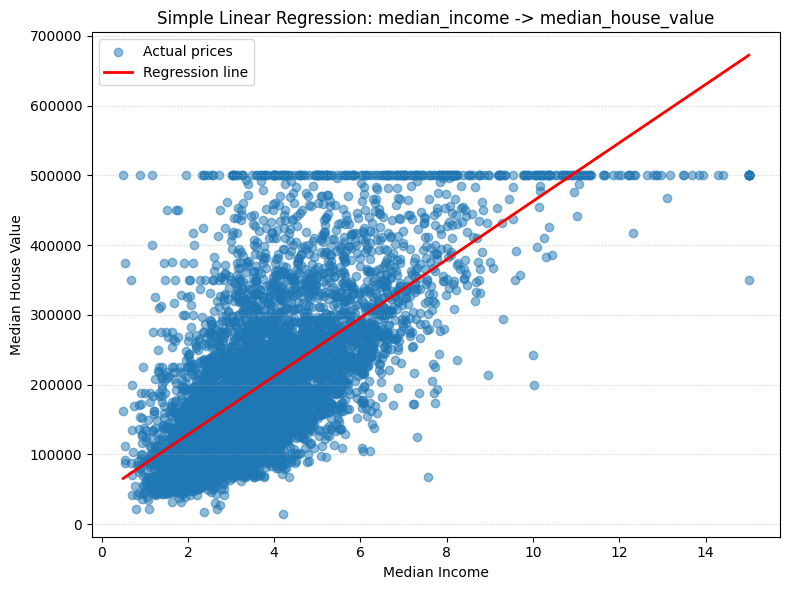

In [74]:
#Step 8: Visualization
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, label='Actual prices', alpha=0.5)

# For smooth regression line, sort by X
sorted_idx = X_test['median_income'].argsort()
plt.plot(
    X_test['median_income'].iloc[sorted_idx],
    y_pred[sorted_idx],
    color='red',
    linewidth=2,
    label='Regression line'
)

plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Simple Linear Regression: median_income -> median_house_value')
plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()